# Draft

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
import datetime as dt

from typing import List

jtplot.style(figsize=(15, 9))

<AxesSubplot:xlabel='Datetime'>

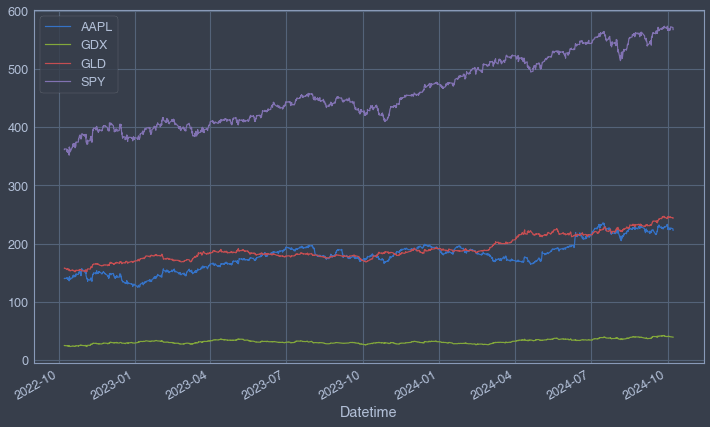

In [4]:
df = pd.read_csv('../../data/bt/gld_gdx_aapl_spy__1H.csv', parse_dates=True, header=[0, 1], index_col=0)
df['Close'].plot()

In [5]:
data = df['Close']['AAPL'].to_frame()
data.rename(columns={'AAPL': 'price'}, inplace=True)

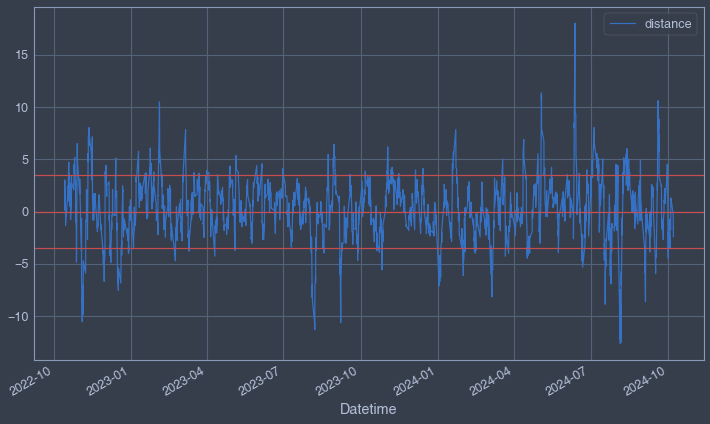

In [6]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

SMA = 25
data['SMA'] = data['price'].rolling(SMA).mean()

threshold = 3.5
data['distance'] = data['price'] - data['SMA']

data['distance'].dropna().plot(legend=True)
plt.axhline(threshold, c='r')
plt.axhline(0, c='r')
plt.axhline(-threshold, c='r')

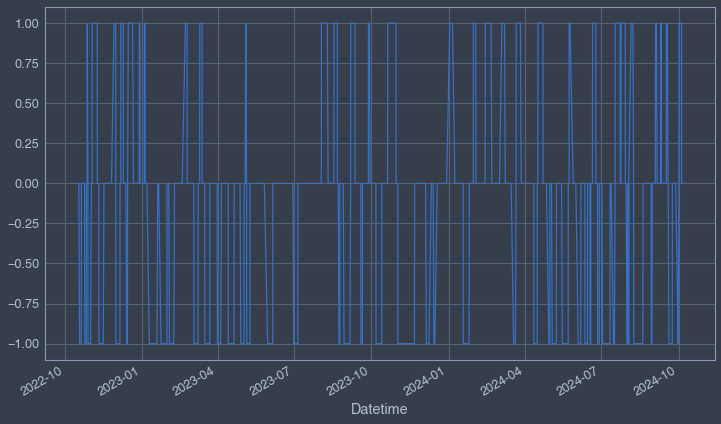

In [7]:
data['position'] = np.where(data['distance'] > threshold, -1, np.nan)  
data['position'] = np.where(data['distance'] < -threshold, 1, data['position'])  
data['position'] = np.where(data['distance'] * data['distance'].shift(1) < 0, 0, data['position'])  
data['position'] = data['position'].ffill().fillna(0)

data['position'].iloc[SMA:].plot(ylim=[-1.1, 1.1]);

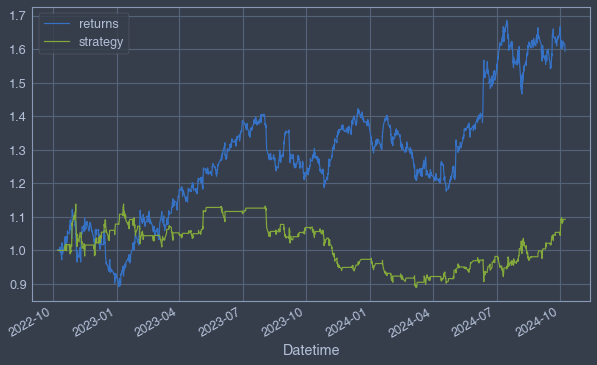

In [8]:
data['strategy'] = data['position'].shift(1) * data['returns']
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));